<h1>  Electrical motor temperature prediction with LSTM, DNN, Random Forest, LinRegression</h1> 

# Intorduction <a class="title_class" id="title_1"></a>

The Permanent Magnet Synchronous Motor (PMSM) is used in many application: electric vehicle, wind turbines, motorcycles: the main advantage of this motors is the low size/weight. <br>
For the best functionality of the PMSM, the temperature of the rotor/magnetic must be monitored by the controle unite to avoid the overheating of the permanent magnetic. <br>
Many solutions are possible:
* Measurement by thermocouples and transmission by radio frequency communication.
* Estimation of the rotor temperature by physical models
* ...


One of the new solution is to use the AI/ML or deep learning to estimate/predict the temperature of the rotor, it can be a low cost solution since we delete the temperature sensor + all system of power supply + communication + filters ... and it can be best that the conventional estimator that use the physical equation. the main default of those estimator is that we need the exact model of the motor to be accurate. <br> <br>
In the below project, we will compare some of regression ML to predict the rotor temperature of the PMSM <br> 
We wil use a [dataset from kaggle](https://www.kaggle.com/datasets/wkirgsn/electric-motor-temperature/data) <br>
For more information about this database please see the [link](https://ieeexplore.ieee.org/document/9296842)

Below the comparison of the 5 models

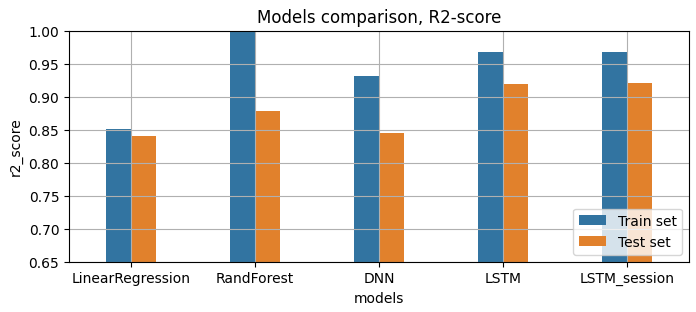

<b><span style="color:#b7190f;">FYI: The actual file is a merge of 8 notebooks, so you will find redundancy in importing the libraries and other parts like "Load data": to see the individual notebook, please see the folder "notebooks"</span></b>

# Table of contents
* [Intorduction](#title_1)
* [Table of contents](#title_2)
* [Data PreProcessing](#title_3)
  * [Import libraries](#title_4)
  * [Load the dataset](#title_5)
  * [Derived inputs](#title_6)
  * [Plots](#title_7)
  * [Split the train/test set](#title_8)
  * [Prepare X and y ](#title_9)
* [Linear Regression model](#title_10)
  * [Import libraries](#title_11)
  * [Load data ](#title_12)
  * [Model](#title_13)
  * [Prediction ](#title_14)
  * [Metrics and plot](#title_15)
  * [Feature importances](#title_16)
* [Random Forest & Random search](#title_17)
  * [Import libraries](#title_18)
  * [Load data ](#title_19)
  * [Model](#title_20)
  * [Prediction ](#title_21)
  * [Metrics and plot](#title_22)
* [Deep Neural Network (DNN)](#title_23)
  * [Import libraries](#title_24)
  * [Load data ](#title_25)
  * [Temporal undersampling](#title_26)
  * [Z normalization](#title_27)
  * [Model ](#title_28)
  * [Prediction ](#title_29)
  * [Metrics and plot](#title_30)
* [Long Short Term Memory (LSTM)](#title_31)
  * [Import libraries](#title_32)
  * [Load data ](#title_33)
  * [Temporal undersampling](#title_34)
  * [Z normalization](#title_35)
  * [Reshape X input](#title_36)
  * [Model ](#title_37)
  * [Prediction ](#title_38)
  * [Metrics and plot](#title_39)
* [Long Short Term Memory (LSTM) With session](#title_40)
  * [Import libraries](#title_41)
  * [Load data ](#title_42)
  * [Temporal undersampling](#title_43)
  * [Z normalization](#title_44)
  * [Reshape X input](#title_45)
  * [The model ](#title_46)
  * [Prediction ](#title_47)
  * [Metrics and plot](#title_48)
* [Models comparison and conclusion](#title_49)
  * [Comparison of the metrics](#title_50)
  * [The comparison of error mean/std of each model](#title_51)
  * [Conclusion](#title_52)

# Data PreProcessing <a class="title_class" id="title_3"></a>

### Import libraries <a class="title_class" id="title_4"></a>

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltt
from matplotlib.pyplot import figure
import seaborn as sns
from utils import *

### Load the dataset <a class="title_class" id="title_5"></a>

You can download the dataset form Kaggle with the below link <br>
https://www.kaggle.com/datasets/wkirgsn/electric-motor-temperature/data

**Dataset Features**
*  u_q   :  Voltage q-component measurement in dq-coordinates (in V)
*  coolant   :  Coolant temperature (in °C)
*  stator_winding   :  Stator winding temperature (in °C) measured with thermocouples
*  u_d   :  Voltage d-component measurement in dq-coordinates
*  stator_tooth   :  Stator tooth temperature (in °C) measured with thermocouples
*  motor_speed   :  Motor speed (in rpm)
*  i_d   :  Current d-component measurement in dq-coordinates
*  i_q   :  Current q-component measurement in dq-coordinates
*  pm   :  Permanent magnet temperature (in °C) measured with thermocouples and transmitted wirelessly via a thermography unit. ==> The output
*  stator_yoke   :  Stator yoke temperature (in °C) measured with 
<br> <br>
All recordings are sampled at 2 Hz. The data set consists of multiple measurement sessions, which can be distinguished from each other by column "profile_id". A measurement session can be between one and six hours long.

In [2]:
df=pd.read_csv(r'../data/raw/measures_v2.csv.zip')

In [3]:
df.head(2)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.08667,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.09239,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17


In [4]:
df.info( memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


Number of sessions

In [5]:
len(df.profile_id.unique())

69

### Derived inputs <a class="title_class" id="title_6"></a>

In [16]:
df2=df.copy()

In [17]:
#voltage magnitude
df2['us']=np.sqrt(df2.u_d**2+df2.u_q**2)

In [23]:
# current magnitude
df2['is']=np.sqrt(df2.i_d**2+df2.i_q**2)

In [24]:
# Electric apparent power
df2['Se']=1.5*df2.us*df2['is']

In [25]:
# Mecanical power 
df2['Pm']=df2.torque*(2*np.pi*df2.motor_speed/60)

### Plots <a class="title_class" id="title_7"></a>

**Mechanical power (Pm) vs apparent electrical power (Se)**

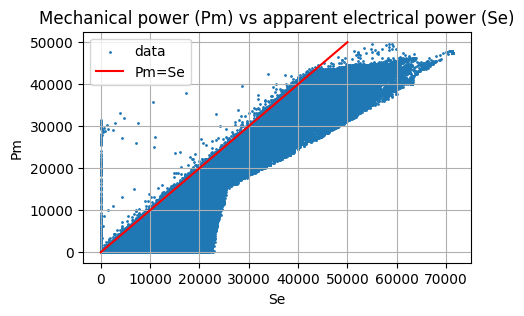

In [36]:
# Plot only Pm> 0 beacause Se >  by definition
df2[df2.Pm>0].plot(x='Se',y='Pm',kind='scatter',s=1,figsize=(5,3),label='data')
plt.plot([0,50000],[0,50000],c='r',label='Pm=Se')
plt.title('Mechanical power (Pm) vs apparent electrical power (Se)')
plt.legend()
plt.grid()
plt.show()

**Torque (N.m) Vs Motor speed (tr/min)**

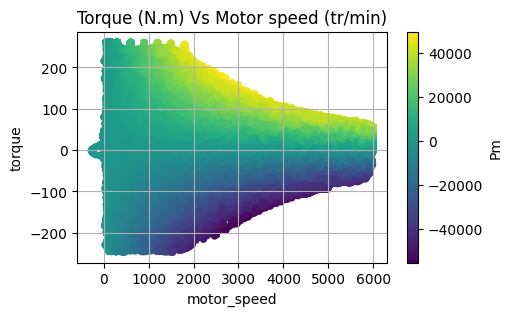

In [38]:
df2.plot.scatter(x= 'motor_speed',y='torque',c='Pm',figsize=(5,3))
plt.title('Torque (N.m) Vs Motor speed (tr/min)')
plt.grid()
plt.show()

**Mechanical Power (Pm W) Vs Motor speed (tr/min)**

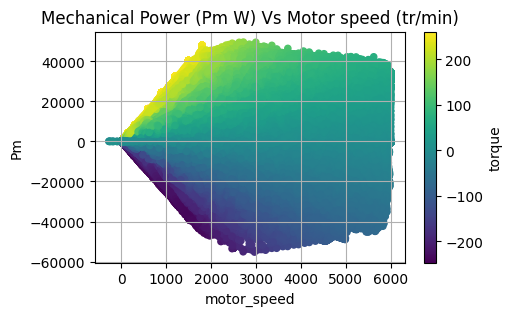

In [39]:
df2.plot.scatter(x= 'motor_speed',y='Pm',c='torque',figsize=(5,3))
plt.title('Mechanical Power (Pm W) Vs Motor speed (tr/min)')
plt.grid()
plt.show()

**The correlation matrix**

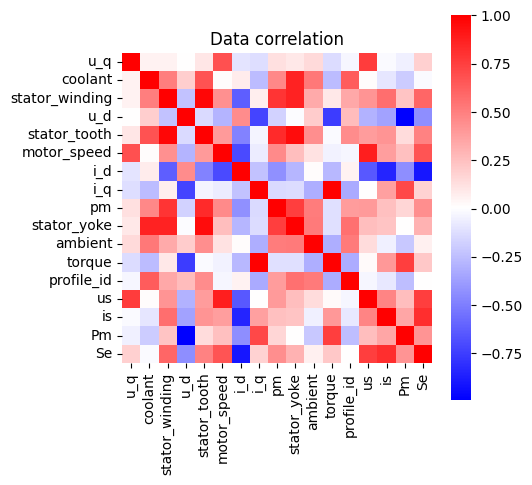

In [65]:
corr=df2.corr()

plt.figure(figsize=(5,5))
sns.heatmap(data=corr,square=True,cmap='bwr')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title('Data correlation')
plt.show()

In [83]:
'Correlation between the output ('+out+') and the inputs'

'Correlation between the output (pm) and the inputs'

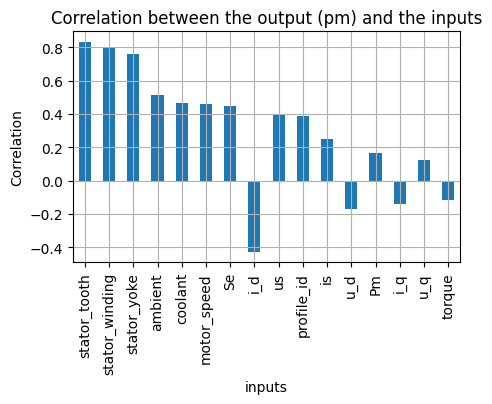

In [86]:
out='pm'
s=corr[out].drop(out)
index_sort=s.abs().sort_values(ascending=False).index
s[index_sort].plot.bar(figsize=(5,3))
plt.title('Correlation between the output ('+out+') and the inputs')
plt.xlabel('inputs')
plt.ylabel('Correlation')
plt.grid()
plt.show()

**Historgam of the output**

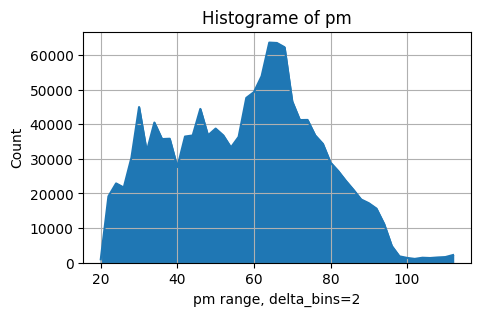

In [98]:
out='pm'
hist=df2[out]
wind=2
# The wind is equivalent to the bins_delta
hist=(hist//wind)*wind
# we can approach the histogram by a sample value count
# otherwise we can use  np.histogram or other fonction: see the second plot
hist=hist.value_counts().sort_index()
hist.plot.area(figsize=(5,3))
plt.title('Histograme of '+out )
plt.xlabel(out + ' range, delta_bins='+str(wind))
plt.ylabel('Count')
plt.grid()
plt.show()

**Density PDF and CDF of the output**

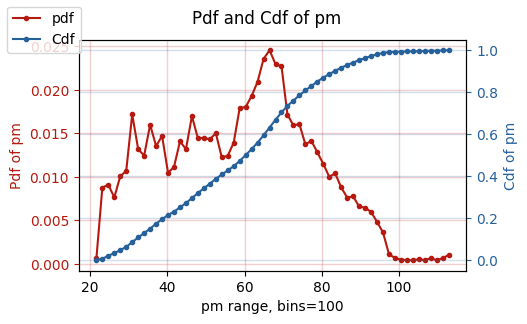

In [161]:
out='pm'

# Color plot 
r='#b7190f'
b='#26619c'

# PDF and CDF calculation
pdf, bins = np.histogram(df2[out], bins=60, density=True)
bins = 0.5 * (bins[:-1] + bins[1:])
cdf=integrate.cumtrapz(pdf, bins, initial=0)

# Create a new figure with two y-axes
fig, ax1 = plt.subplots(figsize=(5,3))
ax2 = ax1.twinx()

# ax1 PDF
ax1.plot(bins, pdf, label='pdf', marker='.',c=r)
ax1.set_xlabel(out + ' range, bins=100')
ax1.set_ylabel('Pdf of '+out,c=r)
ax1.grid(which='major',  color=r, linewidth=1,alpha=0.2)
ax1.tick_params(axis='y', colors=r)

# ax2 CDF
ax2.plot(bins, cdf, label='Cdf', marker='.',c=b)
ax2.set_ylabel('Cdf of '+out,c=b)
ax2.grid(which='major',  color=b, linewidth=1,alpha=0.2)
ax2.tick_params(axis='y', colors=b)


plt.suptitle('Pdf and Cdf of ' + out)
fig.legend(loc='upper left')
plt.show()

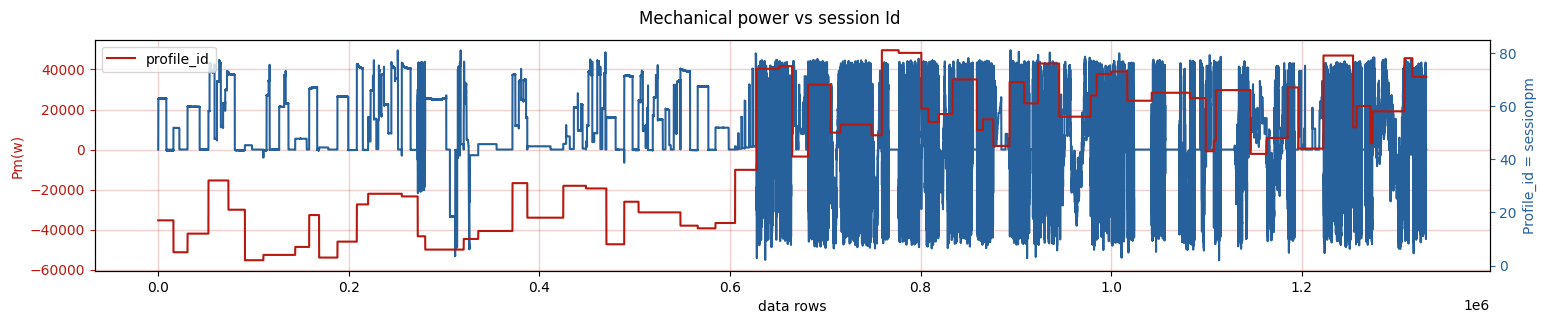

In [169]:
# Color plot 
r='#b7190f'
b='#26619c'

# Create a new figure with two y-axes
fig, ax1 = plt.subplots(figsize=(18, 3))
ax2 = ax1.twinx()

# ax1 Pm
ax1.plot(df2.Pm,label='Pm',c=b)
ax1.set_xlabel('data rows')
ax1.set_ylabel('Pm(w)',c=r)
ax1.grid(which='major',  color=r, linewidth=1,alpha=0.2)
ax1.tick_params(axis='y', colors=r)

# ax2 sessions
ax2.plot(df2.profile_id,label='profile_id',c=r)
ax2.set_ylabel('Profile_id = session'+out,c=b)
ax2.grid(which='major',  color=b, linewidth=1,alpha=0.2)
ax2.tick_params(axis='y', colors=b)

plt.suptitle('Mechanical power vs session Id')
plt.legend()
plt.grid()

### Split the train/test set <a class="title_class" id="title_8"></a>

In general cases, we use the function sklearn.model_selection.train_test_split to split train/test set, but in our case we cant use it because the below points:
* We must respect the time chronology of data
* We must avoid splitting session between train and test if we use train_test_split() with shuffle = True, we can find data of row "t" in train set and the data of row "t+1" in the test set, so the model will fit the train data of "t", and since the data of "t+1" is very close to the data of "t", so the model will predict very will the test set: but if we come with new data like an overfitting. For more information, you can search in google with the keyword "data leakage time series"
* We will make a hand slitting data function that will be adapted to our problem

**The session id**

In [168]:
np.sort(df2.profile_id.iloc[int(6e5):].unique())

array([16, 36, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 78, 79, 80, 81], dtype=int64)

**The spliting funciton**

for more details about this funciton: split_with_groupes
<br> please check the utils package 

In [188]:
df_train,df_test=split_with_groupes(df=df2,groups_col='profile_id',test_size=0.2,seed=0,n_ether=10)

In [189]:
len(df_test)/len(df2),len(df_train)/len(df2)

(0.200810630470328, 0.799189369529672)

In [191]:
df_train2=df_train.reset_index(drop=True)
df_test2=df_test.reset_index(drop=True)

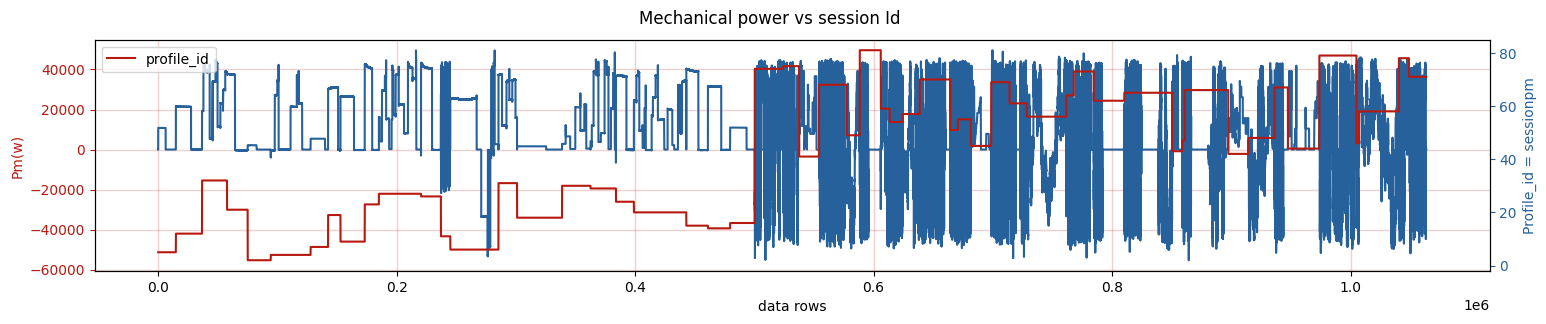

In [192]:
# Color plot 
r='#b7190f'
b='#26619c'

# Create a new figure with two y-axes
fig, ax1 = plt.subplots(figsize=(18, 3))
ax2 = ax1.twinx()

# ax1 Pm
ax1.plot(df_train2.Pm,label='Pm',c=b)
ax1.set_xlabel('data rows')
ax1.set_ylabel('Pm(w)',c=r)
ax1.grid(which='major',  color=r, linewidth=1,alpha=0.2)
ax1.tick_params(axis='y', colors=r)

# ax2 sessions
ax2.plot(df_train2.profile_id,label='profile_id',c=r)
ax2.set_ylabel('Profile_id = session'+out,c=b)
ax2.grid(which='major',  color=b, linewidth=1,alpha=0.2)
ax2.tick_params(axis='y', colors=b)

plt.suptitle('Mechanical power vs session Id')
plt.legend()
plt.grid()

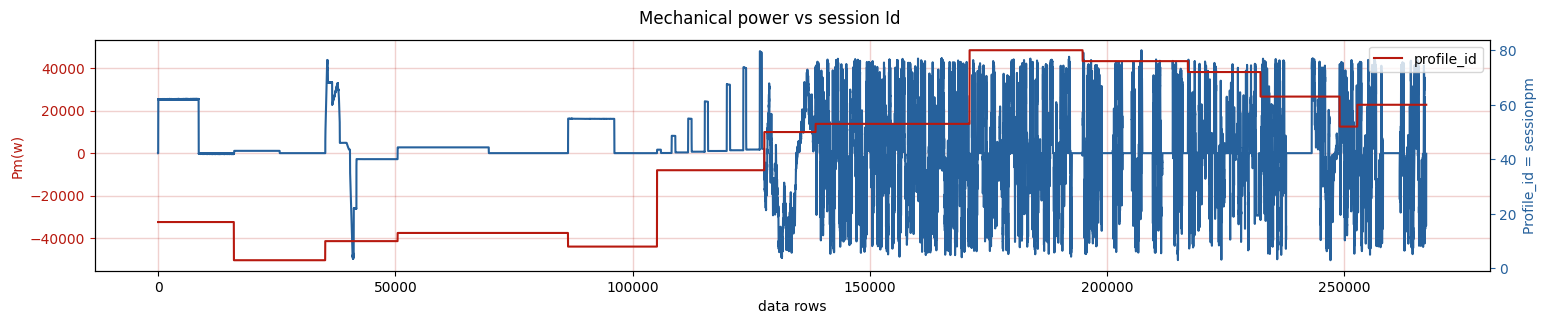

In [193]:
# Color plot 
r='#b7190f'
b='#26619c'

# Create a new figure with two y-axes
fig, ax1 = plt.subplots(figsize=(18, 3))
ax2 = ax1.twinx()

# ax1 Pm
ax1.plot(df_test2.Pm,label='Pm',c=b)
ax1.set_xlabel('data rows')
ax1.set_ylabel('Pm(w)',c=r)
ax1.grid(which='major',  color=r, linewidth=1,alpha=0.2)
ax1.tick_params(axis='y', colors=r)

# ax2 sessions
ax2.plot(df_test2.profile_id,label='profile_id',c=r)
ax2.set_ylabel('Profile_id = session'+out,c=b)
ax2.grid(which='major',  color=b, linewidth=1,alpha=0.2)
ax2.tick_params(axis='y', colors=b)

plt.suptitle('Mechanical power vs session Id')
plt.legend()
plt.grid()

### Prepare X and y  <a class="title_class" id="title_9"></a>

In [195]:
df2.columns

Index(['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'pm', 'stator_yoke', 'ambient', 'torque',
       'profile_id', 'us', 'is', 'Pm', 'Se'],
      dtype='object')

In [196]:
colsx=['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'stator_yoke', 'ambient', 'torque',
       'profile_id','us', 'is', 'Se', 'Pm']
X_train=df_train[colsx]
y_train=df_train[ 'pm' ]

In [197]:
X_test=df_test[colsx]
y_test=df_test[ 'pm' ]

In [198]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1063574, 16), (267242, 16), (1063574,), (267242,))

**Save the data**

In [203]:
np.savez(r'../data/processed/No_normalized_data_V3.npz', 
         X_train=X_train.values, 
         y_train=  y_train.values, 
         X_test=X_test.values, 
         y_test=  y_test.values,
        colsx=colsx,
        colsy=['pm'])

# Linear Regression model <a class="title_class" id="title_10"></a>

We will start with the linear regression model as a simple/fast algorithmic justice for comparison

### Import libraries <a class="title_class" id="title_11"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import joblib
import copy
from sklearn.inspection import permutation_importance
from utils import *

### Load data  <a class="title_class" id="title_12"></a>

In [2]:
load=np.load(r'../data/processed/No_normalized_data_V3.npz')
keys=load.files
X_train, y_train, X_test, y_test= [load[k] for k in keys[:4]]
colsx=load['colsx']
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((1063574, 16), (1063574,), (267242, 16), (267242,))

### Model <a class="title_class" id="title_13"></a>

In [4]:
First_time=False
# If the First_time = True, we will initialize the model, fit it, and saved it 
# Otherwise, we will just load the pretrained model 
if First_time:
    reg = LinearRegression().fit(X_train, y_train)
    joblib.dump(reg, "../models/LinReg/LinReg_V0.joblib")
    reg2=copy.copy(reg)
else: 
    reg2 = joblib.load("../models/LinReg/LinReg_V0.joblib")

### Prediction  <a class="title_class" id="title_14"></a>

In [6]:
yh_train=reg2.predict(X_train)
yh_test=reg2.predict(X_test)

### Metrics and plot <a class="title_class" id="title_15"></a>

**Train/Test set Metrics**

In [23]:
print ('_'*20,'\n','Train set')
print(local_metrics(y_train, yh_train))

print ('_'*20,'\n','Test set')
print(local_metrics(y_test, yh_test))

____________________ 
 Train set
{'r2_score': 0.8509728173767069, 'MSE': 52.41993356822764, 'RMSE': 7.240161156233171, 'NMSE': 0.013107461066154206}
____________________ 
 Test set
{'r2_score': 0.8409277832842572, 'MSE': 52.09309754904043, 'RMSE': 7.217554817875679, 'NMSE': 0.017792183457083922}


**Real vs prediciton plot**

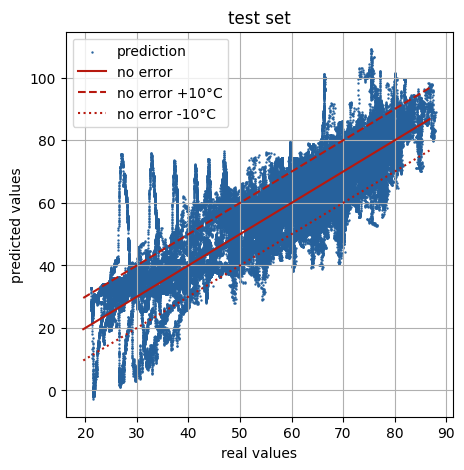

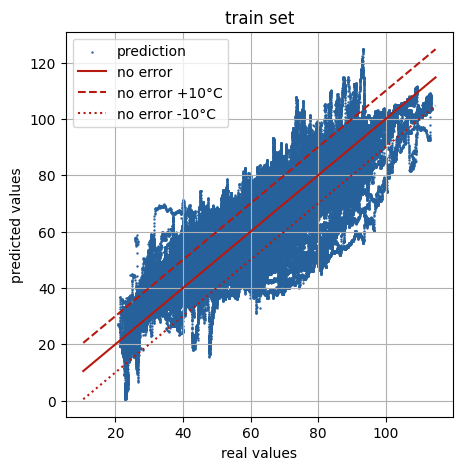

In [72]:
plot_prediction_real(y_train,yh_train,label='train set',offset=10,\
                     fig_size=(5,5))
plot_prediction_real(y_test,yh_test,label='test set',fig_size=(5,5))

**Time serie**

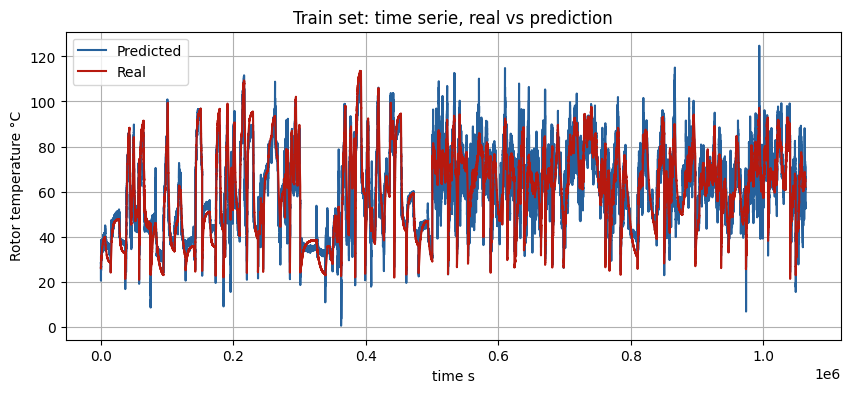

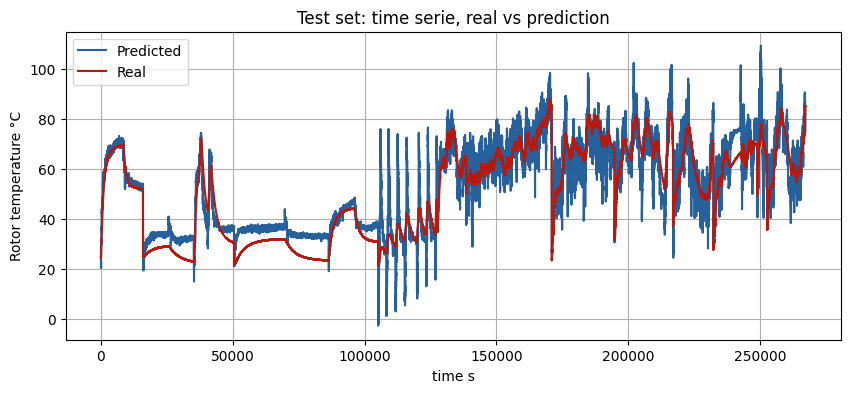

In [67]:
plot_y_yh_time(y_train,yh_train,title='Train set: time serie, real vs prediction',\
               fig_size=(10,4))
plot_y_yh_time(y_test,yh_test,title='Test set: time serie, real vs prediction',\
               fig_size=(10,4))

**Error histogram**

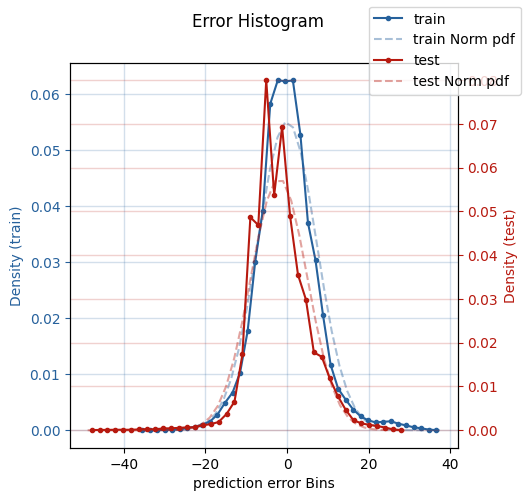

{'test': {'mean': -1.9822191989024145, 'std': 6.940021944961204}, 'train': {'mean': 4.4405223213114105e-14, 'std': 7.24016115623317}}


In [7]:
_=plot_error(y_train, yh_train, y_test, yh_test)

### Feature importances <a class="title_class" id="title_16"></a>

Plot the features importance

In [12]:
P_I=permutation_importance(estimator=reg, X=X_train, y=y_train, 
                           scoring='r2', n_repeats=5, random_state=0)

In [13]:
means=P_I.importances_mean
std=P_I.importances_std

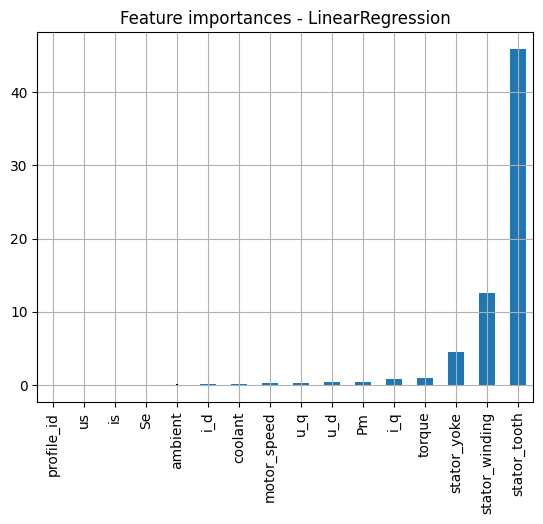

In [14]:
s=pd.Series(np.abs(means),index=colsx)
s=s.sort_values()
s.plot.bar(yerr=std)
plt.grid()
plt.title('Feature importances - LinearRegression')
plt.show()

# Random Forest & Random search <a class="title_class" id="title_17"></a>

We will use the random search to tune the hyperparameters of the random forest model 

### Import libraries <a class="title_class" id="title_18"></a>

In [7]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier
import joblib
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
import matplotlib.pyplot as plt
from utils import *

### Load data  <a class="title_class" id="title_19"></a>

In [3]:
load=np.load(r'../data/processed/No_normalized_data_V3.npz')
keys=load.files
X_train, y_train, X_test, y_test= [load[k] for k in keys[:4]]
colsx=load['colsx']
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((1063574, 16), (1063574,), (267242, 16), (267242,))

### Model <a class="title_class" id="title_20"></a>

**Pipeline**

In [4]:
model = Pipeline(
    [
        (
            "model",
            RandomForestRegressor(criterion='squared_error', verbose=1,n_jobs=-1,random_state=0)
        ),
    ]
)

**Input shape**

In [5]:
n_inp=X_train.shape[1]
print(n_inp)

16


**Random Search parameters**

In [8]:
param_distributions = {
    "model__n_estimators": loguniform_int(100, 500), # default 100
    "model__min_samples_split": uniform_int(1, 5), # default 2
    "model__max_depth": loguniform_int(20, 150), # default None
    "model__min_samples_leaf": loguniform_int(1, 5), # default 1
    "model__max_features":uniform_int(5, n_inp) # default 1.0
}

model_random_search = RandomizedSearchCV(
    model,
    param_distributions=param_distributions,
    n_iter=15, #  number of different combinations to try,
    cv=4,# number of folds to use for cross validation: 5 mean 25% for val and 75% for test
    verbose=1,
)

**Fit**

In [27]:
First_time=False
# If the First_time = True, we will initialize the model, fit it, and saved it 
# Otherwise, we will just load the pretrained model 
if First_time:
    # fit the model 
    model_random_search.fit(X_train, y_train)
    # Save the model
    joblib.dump(model_random_search, r'../models/RandForest/RandSear_RandFor_V1.pkl')
else: 
    # Load the model
    model_random_search2=joblib.load(r'../models/RandForest/RandSear_RandFor_V1.pkl')

In [11]:
#Make a beep to notify the end of model training
import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 2000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

**The best estimator and the best parameters**

In [17]:
'''Resultat 
RandomForestRegressor(max_depth=68, max_features=5, min_samples_leaf=3,
                      min_samples_split=5, n_estimators=276, n_jobs=-1,
                      random_state=0, verbose=1)
'''
RF_best=model_random_search2.best_estimator_ ['model']
RF_best

RandomForestRegressor(max_depth=68, max_features=5, min_samples_leaf=3,
                      min_samples_split=5, n_estimators=276, n_jobs=-1,
                      random_state=0, verbose=1)

In [16]:
'''
Resultat:
{'model__max_depth': 68,
 'model__max_features': 5,
 'model__min_samples_leaf': 3,
 'model__min_samples_split': 5,
 'model__n_estimators': 276}
'''
model_random_search2.best_params_

{'model__max_depth': 68,
 'model__max_features': 5,
 'model__min_samples_leaf': 3,
 'model__min_samples_split': 5,
 'model__n_estimators': 276}

### Prediction  <a class="title_class" id="title_21"></a>

In [19]:
yh_train=RF_best.predict(X_train)
yh_test=RF_best.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    3.6s
[Parallel(n_jobs=8)]: Done 276 out of 276 | elapsed:    5.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 276 out of 276 | elapsed:    0.9s finished


### Metrics and plot <a class="title_class" id="title_22"></a>

**Train/Test set Metrics**

In [20]:
print ('_'*20,'\n','Train set')
print(local_metrics(y_train, yh_train))

print ('_'*20,'\n','Test set')
print(local_metrics(y_test, yh_test))

____________________ 
 Train set
{'r2_score': 0.9999009769749209, 'MSE': 0.03483109795810131, 'RMSE': 0.18663091372573118, 'NMSE': 8.709420811893875e-06}
____________________ 
 Test set
{'r2_score': 0.8775015737002211, 'MSE': 40.1158832295746, 'RMSE': 6.333710068322878, 'NMSE': 0.013701415111505402}


**Real vs prediciton plot**

In [21]:
y_train, yh_train

(array([25.89539337, 25.88982391, 25.88938141, ..., 62.13838736,
        62.13342152, 62.13142866]),
 array([25.74892074, 25.80154233, 25.81084665, ..., 62.05531916,
        62.08200314, 61.92952095]))

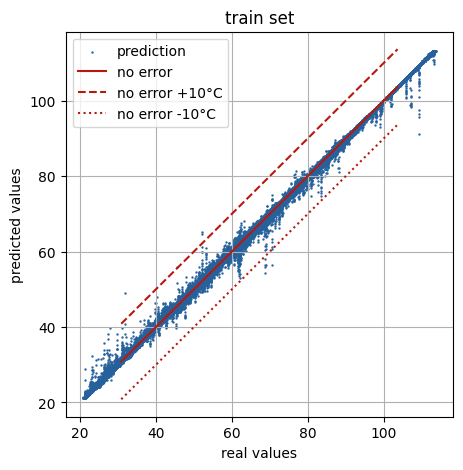

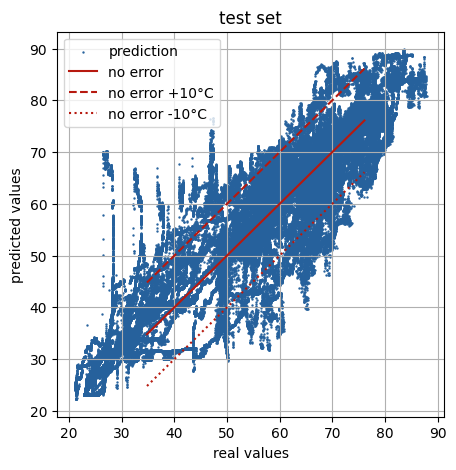

In [22]:
plot_prediction_real(y_train,yh_train,label='train set',offset=10,\
                     fig_size=(5,5))
plot_prediction_real(y_test,yh_test,label='test set',fig_size=(5,5))

**Time serie**

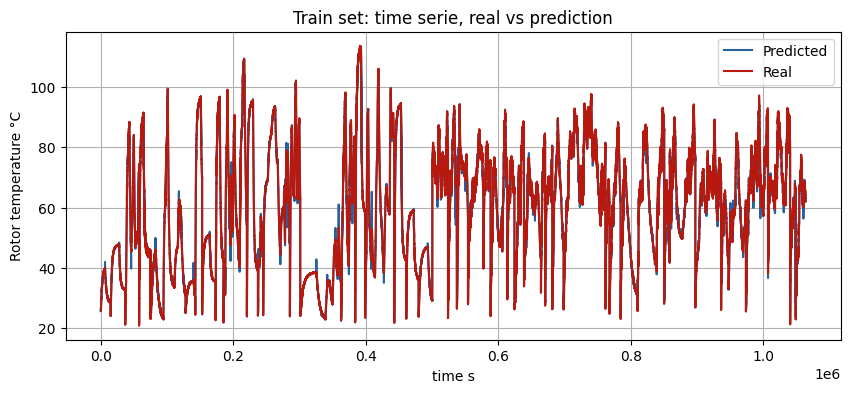

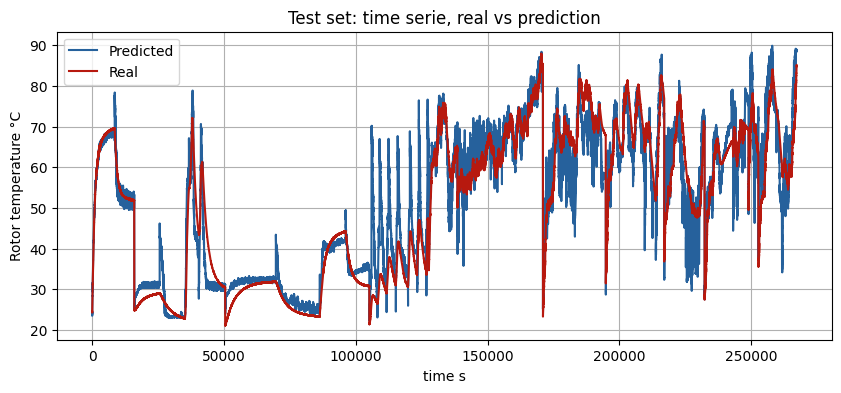

In [23]:
plot_y_yh_time(y_train,yh_train,title='Train set: time serie, real vs prediction',\
               fig_size=(10,4))
plot_y_yh_time(y_test,yh_test,title='Test set: time serie, real vs prediction',\
               fig_size=(10,4))

**Error histogram**

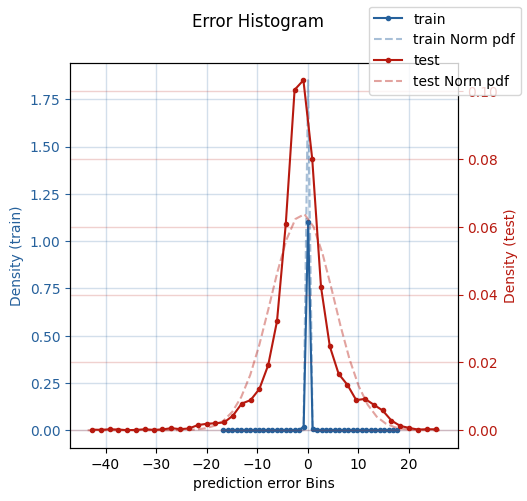

{'test': {'mean': -1.0235385796178915, 'std': 6.250460143510107}, 'train': {'mean': -0.00014658345299136245, 'std': 0.1866308561610128}}


In [24]:
_=plot_error(y_train, yh_train, y_test, yh_test)

# Deep Neural Network (DNN) <a class="title_class" id="title_23"></a>

### Import libraries <a class="title_class" id="title_24"></a>

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import json
from utils import *

### Load data  <a class="title_class" id="title_25"></a>

In [2]:
load=np.load(r'../data/processed/No_normalized_data_V3.npz')
keys=load.files
X_train0, y_train0, X_test0, y_test0= [load[k] for k in keys[:4]]
colsx=load['colsx']
X_train0.shape , y_train0.shape, X_test0.shape, y_test0.shape

((1063574, 16), (1063574,), (267242, 16), (267242,))

### Temporal undersampling <a class="title_class" id="title_26"></a>

The data was recorded with a sampling frequency of 2Hz (sampling time of 0.5s). In this problem, we tray to predict the rotor temperature, the temperature inertia of the rotor is order of minute, so I propose to undersampling the data from Ts=500 ms to Ts=5s to fast the training of the DNN

In [3]:
X_train=X_train0[::10]
X_test=X_test0[::10]
y_train=y_train0[::10]
y_test=y_test0[::10]
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((106358, 16), (106358,), (26725, 16), (26725,))

### Z normalization <a class="title_class" id="title_27"></a>

In [4]:
# Input normalization 

Mean=X_train.mean(axis=0)
Xn_train=X_train-Mean
STD=Xn_train.std(axis=0)
Xn_train= Xn_train / STD

Xn_test=X_test-Mean
Xn_test= Xn_test / STD

In [5]:
# check the normalization of the data: mean must be close to 0
np.abs(Xn_train.mean(axis=0)).max(), np.abs(Xn_test.mean(axis=0)).max()

(3.7625535341026386e-16, 0.3791241789891576)

In [6]:
# check the normalization of the data: STD must be close to 1
np.abs(Xn_train.std(axis=0)).max(), np.abs(Xn_test.std(axis=0)).max()

(1.0, 1.1727066598738511)

In [7]:
# Output normalization
# We will use a tanh as activation function of the output layer 
# So I propose to centralize the output in the range [-0.9,0.9]
# [-0.9,0.9] avoid the extraime limite of the tanh [-1,1]
# In those limite the derivation is 0, so it is slow to train data when 
# the output is very close to -1/1
y_min=y_train.min()
y_max=y_train.max()
yn_train=1.8*((y_train-y_min)/(y_max-y_min)-0.5)
# check the normalization of the train set
yn_train.min(), yn_train.max()

(-0.9, 0.9)

In [8]:
yn_test=1.8*((y_test-y_min)/(y_max-y_min)-0.5)
# check the normalization of the test set
yn_test.min(), yn_test.max()

(-0.8963086086661727, 0.3961655575613971)

the max of yn_test is 0.396 instead of 0.9 because the max of y_test is 87°C and the max of y_train is 113°C: see below

In [9]:
y_test.min(),y_train.min(), y_test.max(),y_train.max()

(21.04705619812012, 20.856956481933597, 87.60704671625562, 113.55357360839844)

### Model  <a class="title_class" id="title_28"></a>

In [10]:
# Creat the model 
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
for i in range(7):
    model.add(Dense(12,activation='relu'))
model.add(Dense(1,activation='tanh'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                204       
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 12)                156       
                                                                 
 dense_3 (Dense)             (None, 12)                156       
                                                                 
 dense_4 (Dense)             (None, 12)                156       
                                                                 
 dense_5 (Dense)             (None, 12)                156       
                                                                 
 dense_6 (Dense)             (None, 12)                1

In [11]:
# This checkpoint will save an intermediate model each 10 epochs
checkpoint = ModelCheckpoint('model_DNN_{epoch:03d}.h5', period=10,verbose=1) 

In [12]:
# Compile the model using Adam optimizer
model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse' )

In [28]:
# Train the model
history=model.fit(Xn_train, yn_train, epochs=20, batch_size=64,
         callbacks=[checkpoint], validation_data=(Xn_test,yn_test))


Epoch 1/20
1662/1662 [==============================] - 3s 2ms/step - loss: 0.0250 - val_loss: 0.0296
Epoch 2/20
1662/1662 [==============================] - 3s 2ms/step - loss: 0.0164 - val_loss: 0.0221
Epoch 3/20
1662/1662 [==============================] - 2s 1ms/step - loss: 0.0144 - val_loss: 0.0192
Epoch 4/20
1662/1662 [==============================] - 2s 1ms/step - loss: 0.0133 - val_loss: 0.0166
Epoch 5/20
1662/1662 [==============================] - 3s 2ms/step - loss: 0.0126 - val_loss: 0.0194
Epoch 6/20
1662/1662 [==============================] - 2s 1ms/step - loss: 0.0122 - val_loss: 0.0204
Epoch 7/20
1662/1662 [==============================] - 2s 1ms/step - loss: 0.0118 - val_loss: 0.0189
Epoch 8/20
1662/1662 [==============================] - 2s 1ms/step - loss: 0.0114 - val_loss: 0.0170
Epoch 9/20
1662/1662 [==============================] - 2s 1ms/step - loss: 0.0111 - val_loss: 0.0164
Epoch 10/20
1639/1662 [============================>.] - ETA: 0s - loss: 0.0108
Ep

In [10]:
First_time=False
# If the First_time = True, we will initialize the model, fit it, and saved it 
# Otherwise, we will just load the pretrained model 
if First_time:
    # Save the model
    model.save(r'../models/DNN/model_DNN_final.h5')
    history=history.history
    json.dump( history, open( "../models/DNN/history.json", 'w' ) )
else: 
    # Load the model
    model2 = load_model(r'../models/DNN/model_DNN_final.h5')
    history = json.load( open( "../models/DNN/history.json") )

Make a beep to notify the end of model training

In [14]:
import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 2000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

Plot the loss of the prediciton

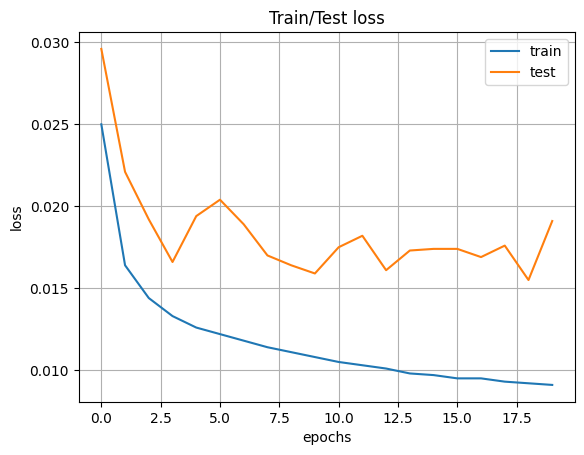

In [29]:
plt.plot(history['loss'],label='train')
plt.plot(history['val_loss'],label='test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Train/Test loss')
plt.legend()
plt.grid()
plt.show()

### Prediction  <a class="title_class" id="title_29"></a>

In [11]:
ynh_train=model2.predict(Xn_train)
ynh_test=model2.predict(Xn_test)

836/836 [==============================] - 1s 882us/step


**From the normalized output to the °C**

In [12]:
yh_test=(ynh_test.flatten()/1.8+0.5)*(y_max-y_min)+y_min
yh_train=(ynh_train.flatten()/1.8+0.5)*(y_max-y_min)+y_min

### Metrics and plot <a class="title_class" id="title_30"></a>

**Train/Test set Metrics**

In [18]:
print ('_'*20,'\n','Train set')
print(local_metrics(y_train, yh_train))

print ('_'*20,'\n','Test set')
print(local_metrics(y_test, yh_test))

____________________ 
 Train set
{'r2_score': 0.9319059301052521, 'MSE': 23.95176822640016, 'RMSE': 4.8940543750963945, 'NMSE': 0.005988927218422694}
____________________ 
 Test set
{'r2_score': 0.8455059571217549, 'MSE': 50.596522986960906, 'RMSE': 7.113123293389544, 'NMSE': 0.01728099215889291}


**Real vs prediciton plot**

In [19]:
y_train, yh_train

(array([25.89539337, 25.90344429, 25.95416451, ..., 62.27448128,
        62.21632837, 62.14264575]),
 array([28.247816, 28.550337, 28.454178, ..., 59.46094 , 57.67937 ,
        57.303215], dtype=float32))

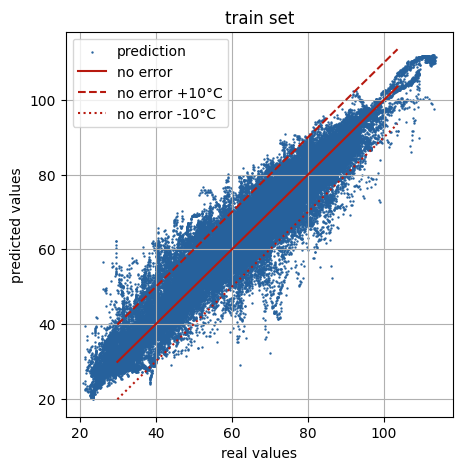

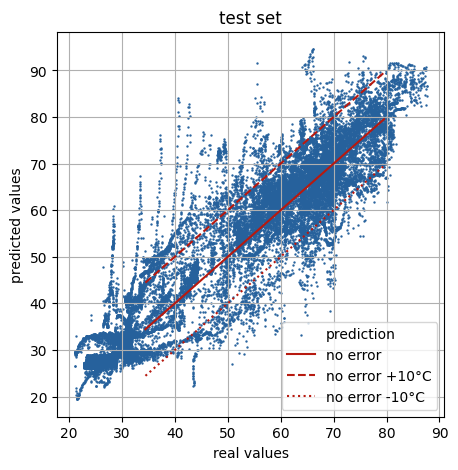

In [20]:
plot_prediction_real(y_train,yh_train,label='train set',offset=10,\
                     fig_size=(5,5))
plot_prediction_real(y_test,yh_test,label='test set',fig_size=(5,5))

**Time serie**

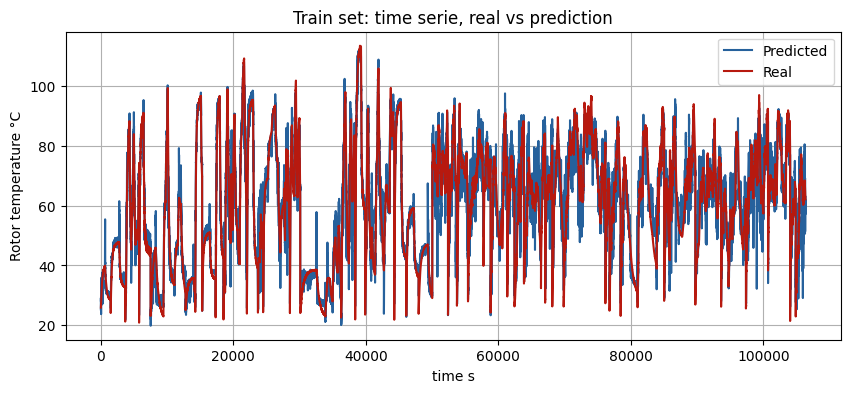

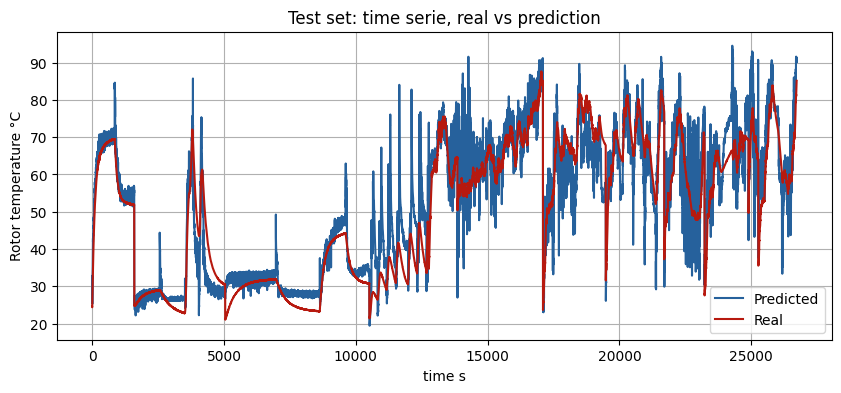

In [21]:
plot_y_yh_time(y_train,yh_train,title='Train set: time serie, real vs prediction',\
               fig_size=(10,4))
plot_y_yh_time(y_test,yh_test,title='Test set: time serie, real vs prediction',\
               fig_size=(10,4))

**Error histogram**

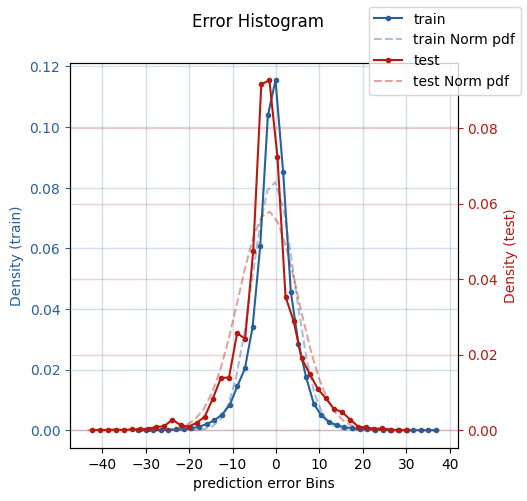

{'test': {'mean': -1.7818939510828322, 'std': 6.886318097071564}, 'train': {'mean': -0.6292989497877967, 'std': 4.853426733576612}}


In [13]:
_=plot_error(y_train, yh_train, y_test, yh_test)

# Long Short Term Memory (LSTM) <a class="title_class" id="title_31"></a>

### Import libraries <a class="title_class" id="title_32"></a>

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import json
from utils import *

### Load data  <a class="title_class" id="title_33"></a>

In [2]:
load=np.load(r'../data/processed/No_normalized_data_V3.npz')
keys=load.files
X_train0, y_train0, X_test0, y_test0= [load[k] for k in keys[:4]]
colsx=load['colsx']
X_train0.shape , y_train0.shape, X_test0.shape, y_test0.shape

((1063574, 16), (1063574,), (267242, 16), (267242,))

### Temporal undersampling <a class="title_class" id="title_34"></a>

The data was recorded with a sampling frequency of 2Hz (sampling time of 0.5s). In this problem, we tray to predict the rotor temperature, the temperature inertia of the rotor is order of minute, so I propose to undersampling the data from Ts=500 ms to Ts=5s to fast the training of the DNN

In [3]:
X_train=X_train0[::10]
X_test=X_test0[::10]
y_train=y_train0[::10]
y_test=y_test0[::10]
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((106358, 16), (106358,), (26725, 16), (26725,))

### Z normalization <a class="title_class" id="title_35"></a>

In [4]:
# Input normalization 

Mean=X_train.mean(axis=0)
Xn_train=X_train-Mean
STD=Xn_train.std(axis=0)
Xn_train= Xn_train / STD

Xn_test=X_test-Mean
Xn_test= Xn_test / STD

In [5]:
# check the normalization of the data: mean must be close to 0
np.abs(Xn_train.mean(axis=0)).max(), np.abs(Xn_test.mean(axis=0)).max()

(3.7625535341026386e-16, 0.3791241789891576)

In [6]:
# check the normalization of the data: STD must be close to 1
np.abs(Xn_train.std(axis=0)).max(), np.abs(Xn_test.std(axis=0)).max()

(1.0, 1.1727066598738511)

In [7]:
# Output normalization
# We will use a tanh as activation function of the output layer 
# So I propose to centralize the output in the range [-0.9,0.9]
# [-0.9,0.9] avoid the extraime limite of the tanh [-1,1]
# In those limite the derivation is 0, so it is slow to train data when 
# the output is very close to -1/1
y_min=y_train.min()
y_max=y_train.max()
yn_train=1.8*((y_train-y_min)/(y_max-y_min)-0.5)
# check the normalization of the train set
yn_train.min(), yn_train.max()

(-0.9, 0.9)

In [8]:
yn_test=1.8*((y_test-y_min)/(y_max-y_min)-0.5)
# check the normalization of the test set
yn_test.min(), yn_test.max()

(-0.8963086086661727, 0.3961655575613971)

the max of yn_test is 0.396 instead of 0.9 because the max of y_test is 87°C and the max of y_train is 113°C: see below

In [9]:
y_test.min(),y_train.min(), y_test.max(),y_train.max()

(21.04705619812012, 20.856956481933597, 87.60704671625562, 113.55357360839844)

### Reshape X input <a class="title_class" id="title_36"></a>

In [10]:
def recursive_array(arr, n_window):
    arr_out=[]
    for i in range(n_window, len(arr)):
        arr_out.append(arr[i-n_window:i])
    arr_out=np.array(arr_out)
    return arr_out

In [11]:
n_window=50 # 50*5s = 250s 

Xn3_test=recursive_array(Xn_test, n_window=n_window)

Xn3_train=recursive_array(Xn_train, n_window=n_window)

In [12]:
yn3_train=yn_train[n_window:]
yn3_test=yn_test[n_window:]

In [13]:
Xn_train.shape , yn_train.shape, Xn_test.shape, yn_test.shape

((106358, 16), (106358,), (26725, 16), (26725,))

In [14]:
Xn3_train.shape , yn3_train.shape, Xn3_test.shape, yn3_test.shape

((106308, 50, 16), (106308,), (26675, 50, 16), (26675,))

### Model  <a class="title_class" id="title_37"></a>

In [15]:
# Creat the model 
model = Sequential()
model.add(LSTM(16, return_sequences=True, input_shape=Xn3_train.shape[1:]))
model.add(Dropout(.2))
model.add(LSTM(16))
model.add(Dropout(.2))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='tanh'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 16)            2112      
                                                                 
 dropout (Dropout)           (None, 50, 16)            0         
                                                                 
 lstm_1 (LSTM)               (None, 16)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4,513
Trainable params: 4,513
Non-trainabl

In [22]:
# This checkpoint will save an intermediate model each 10 epochs
checkpoint = ModelCheckpoint('model_LSTM_{epoch:03d}.h5', period=10,verbose=1) 

In [23]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse' )

In [131]:
# Train the model
history=model.fit(Xn3_train, yn3_train, epochs=20, batch_size=64,
         callbacks=[checkpoint], validation_data=(Xn3_test,yn3_test))

Epoch 1/20
1662/1662 [==============================] - 13s 7ms/step - loss: 0.0189 - val_loss: 0.0098
Epoch 2/20
1662/1662 [==============================] - 11s 6ms/step - loss: 0.0103 - val_loss: 0.0094
Epoch 3/20
1662/1662 [==============================] - 11s 7ms/step - loss: 0.0085 - val_loss: 0.0084
Epoch 4/20
1662/1662 [==============================] - 11s 6ms/step - loss: 0.0071 - val_loss: 0.0120
Epoch 5/20
1662/1662 [==============================] - 11s 6ms/step - loss: 0.0060 - val_loss: 0.0097
Epoch 6/20
1662/1662 [==============================] - 11s 6ms/step - loss: 0.0053 - val_loss: 0.0091
Epoch 7/20
1662/1662 [==============================] - 10s 6ms/step - loss: 0.0049 - val_loss: 0.0103
Epoch 8/20
1662/1662 [==============================] - 11s 6ms/step - loss: 0.0046 - val_loss: 0.0104
Epoch 9/20
1662/1662 [==============================] - 11s 6ms/step - loss: 0.0043 - val_loss: 0.0099
Epoch 10/20
1662/1662 [==============================] - 11s 6ms/step - l

In [16]:
First_time=False
# If the First_time = True, we will initialize the model, fit it, and saved it 
# Otherwise, we will just load the pretrained model 
if First_time:
    # Save the model
    model.save(r'../models/LSTM/model_LSTM_final.h5')
    history=history.history
    json.dump( history, open( "../models/LSTM/history.json", 'w' ) )
else: 
    # Load the model
    model2 = load_model(r'../models/LSTM/model_LSTM_final.h5')
    history = json.load( open( "../models/LSTM/history.json") )

Make a beep to notify the end of model training

In [45]:
import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 2000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

Plot the loss of the prediciton

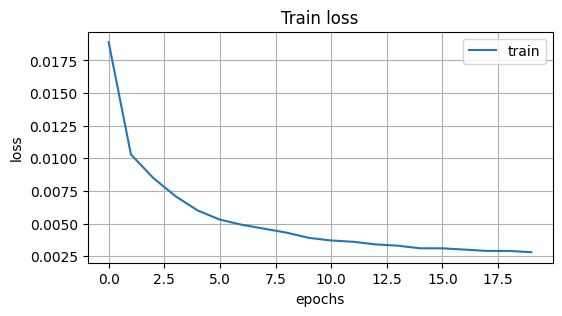

In [70]:
fig = plt.figure(figsize=(6,3))
plt.plot(history['loss'],label='train')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Train loss')
plt.legend()
plt.grid()
plt.show()

### Prediction  <a class="title_class" id="title_38"></a>

In [17]:
ynh_train=model2.predict(Xn3_train)
ynh_test=model2.predict(Xn3_test)

834/834 [==============================] - 7s 8ms/step


**From the normalized output to the °C**

In [18]:
yh_test=(ynh_test.flatten()/1.8+0.5)*(y_max-y_min)+y_min
yh_train=(ynh_train.flatten()/1.8+0.5)*(y_max-y_min)+y_min

In [19]:
# adapte the outputs to take in account the windaw 
# and to have the same size of inputs and outputs 
y_train=y_train[n_window:]
y_test=y_test[n_window:]

### Metrics and plot <a class="title_class" id="title_39"></a>

**Train/Test set Metrics**

In [82]:
print ('_'*20,'\n','Train set')
print(local_metrics(y_train, yh_train))

print ('_'*20,'\n','Test set')
print(local_metrics(y_test, yh_test))

____________________ 
 Train set
{'r2_score': 0.9668431402709771, 'MSE': 11.651057054092657, 'RMSE': 3.41336447718269, 'NMSE': 0.0029121275239807}
____________________ 
 Test set
{'r2_score': 0.9195336751782257, 'MSE': 26.34358586713694, 'RMSE': 5.13260030268644, 'NMSE': 0.008986687432743007}


**Real vs prediciton plot**

In [83]:
y_train, yh_train

(array([28.7659359 , 28.75426102, 28.8516655 , ..., 62.27448128,
        62.21632837, 62.14264575]),
 array([29.180582, 29.36076 , 29.525795, ..., 66.45154 , 66.41196 ,
        66.3602  ], dtype=float32))

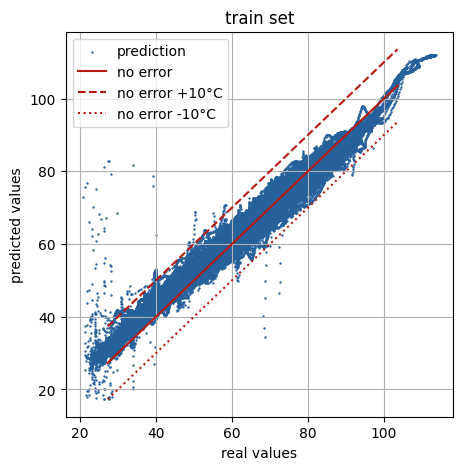

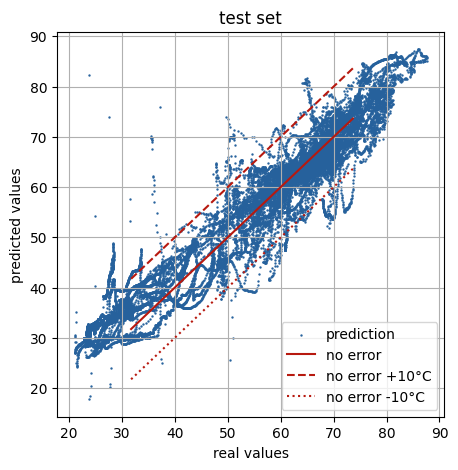

In [84]:
plot_prediction_real(y_train,yh_train,label='train set',offset=10,\
                     fig_size=(5,5))
plot_prediction_real(y_test,yh_test,label='test set',fig_size=(5,5))

**Time serie**

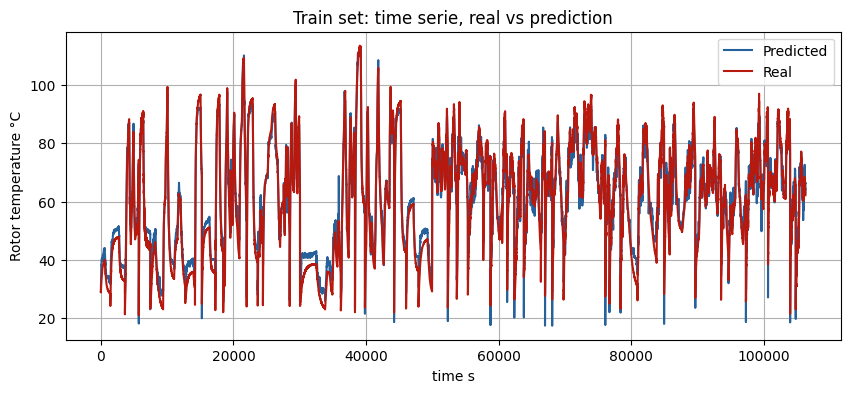

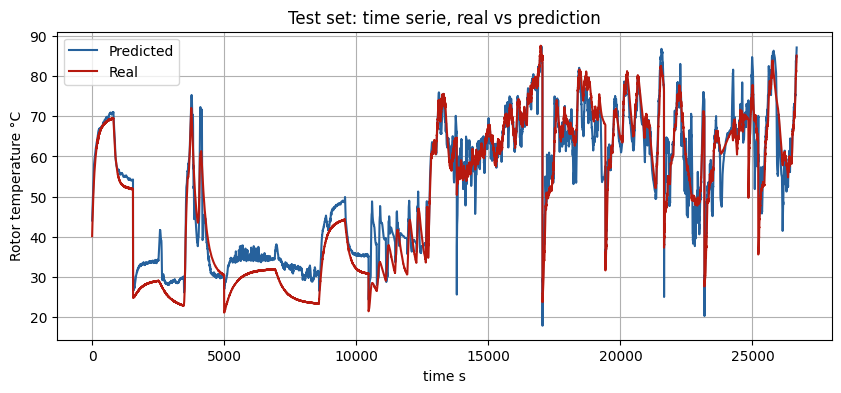

In [85]:
plot_y_yh_time(y_train,yh_train,title='Train set: time serie, real vs prediction',\
               fig_size=(10,4))
plot_y_yh_time(y_test,yh_test,title='Test set: time serie, real vs prediction',\
               fig_size=(10,4))

**Error histogram**

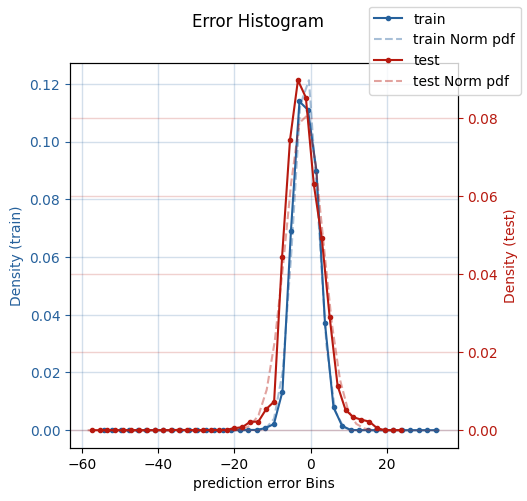

{'test': {'mean': -1.6058626449807745, 'std': 4.874914464130862}, 'train': {'mean': -1.2347944542939768, 'std': 3.1821910234518445}}


In [20]:
_=plot_error(y_train, yh_train, y_test, yh_test)

# Long Short Term Memory (LSTM) With session <a class="title_class" id="title_40"></a>

### Import libraries <a class="title_class" id="title_41"></a>

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import json
from utils import *

### Load data  <a class="title_class" id="title_42"></a>

In [2]:
load=np.load(r'../data/processed/No_normalized_data_V3.npz')
keys=load.files
X_train0, y_train0, X_test0, y_test0= [load[k] for k in keys[:4]]
colsx=load['colsx']
X_train0.shape , y_train0.shape, X_test0.shape, y_test0.shape

((1063574, 16), (1063574,), (267242, 16), (267242,))

### Temporal undersampling <a class="title_class" id="title_43"></a>

The data was recorded with a sampling frequency of 2Hz (sampling time of 0.5s). In this problem, we tray to predict the rotor temperature, the temperature inertia of the rotor is order of minute, so I propose to undersampling the data from Ts=500 ms to Ts=5s to fast the training of the DNN

In [3]:
X_train=X_train0[::10]
X_test=X_test0[::10]
y_train=y_train0[::10]
y_test=y_test0[::10]
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((106358, 16), (106358,), (26725, 16), (26725,))

### Z normalization <a class="title_class" id="title_44"></a>

In [4]:
# Input normalization 

Mean=X_train.mean(axis=0)
Xn_train=X_train-Mean
STD=Xn_train.std(axis=0)
Xn_train= Xn_train / STD

Xn_test=X_test-Mean
Xn_test= Xn_test / STD

In [5]:
# check the normalization of the data: mean must be close to 0
np.abs(Xn_train.mean(axis=0)).max(), np.abs(Xn_test.mean(axis=0)).max()

(3.7625535341026386e-16, 0.3791241789891576)

In [6]:
# check the normalization of the data: STD must be close to 1
np.abs(Xn_train.std(axis=0)).max(), np.abs(Xn_test.std(axis=0)).max()

(1.0, 1.1727066598738511)

In [7]:
# Output normalization
# We will use a tanh as activation function of the output layer 
# So I propose to centralize the output in the range [-0.9,0.9]
# [-0.9,0.9] avoid the extraime limite of the tanh [-1,1]
# In those limite the derivation is 0, so it is slow to train data when 
# the output is very close to -1/1
y_min=y_train.min()
y_max=y_train.max()
yn_train=1.8*((y_train-y_min)/(y_max-y_min)-0.5)
# check the normalization of the train set
yn_train.min(), yn_train.max()

(-0.9, 0.9)

In [8]:
yn_test=1.8*((y_test-y_min)/(y_max-y_min)-0.5)
# check the normalization of the test set
yn_test.min(), yn_test.max()

(-0.8963086086661727, 0.3961655575613971)

the max of yn_test is 0.396 instead of 0.9 because the max of y_test is 87°C and the max of y_train is 113°C: see below

In [9]:
y_test.min(),y_train.min(), y_test.max(),y_train.max()

(21.04705619812012, 20.856956481933597, 87.60704671625562, 113.55357360839844)

### Reshape X input <a class="title_class" id="title_45"></a>

In [10]:
def recursive_Xy_session(X,y, n_window,session):
    X_out=[]
    y_out=[]
    for i in range(n_window, len(X)):
        if len(np.unique(X[i-n_window:i][:,profile_id]))==1:
            X_out.append(X[i-n_window:i])
            y_out.append(y[i])
    X_out=np.array(X_out)
    y_out=np.array(y_out)
    return X_out,y_out

In [11]:
profile_id=np.argmax((colsx=='profile_id').astype(int))

In [12]:
print(set(X_train[:,profile_id]))

{2.0, 4.0, 5.0, 6.0, 7.0, 9.0, 11.0, 12.0, 14.0, 15.0, 16.0, 18.0, 19.0, 20.0, 21.0, 23.0, 24.0, 26.0, 27.0, 29.0, 30.0, 31.0, 32.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 51.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 61.0, 62.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 73.0, 74.0, 75.0, 78.0, 79.0, 81.0}


In [13]:
session_train=X_train[:,profile_id]
session_test=X_test[:,profile_id]
session_train

array([ 5.,  5.,  5., ..., 71., 71., 71.])

In [14]:
n_win=50 # 50*5s = 250s 

Xn3_test,yn3_test =recursive_Xy_session(Xn_test,yn_test, n_window=n_win,session=session_train)

Xn3_train, yn3_train=recursive_Xy_session(Xn_train,yn_train, n_window=n_win,session=session_test)

In [15]:
Xn_train.shape , yn_train.shape, Xn_test.shape, yn_test.shape

((106358, 16), (106358,), (26725, 16), (26725,))

In [16]:
Xn3_train.shape , yn3_train.shape, Xn3_test.shape, yn3_test.shape

((103662, 50, 16), (103662,), (26038, 50, 16), (26038,))

### The model  <a class="title_class" id="title_46"></a>

In [43]:
model = Sequential()
model.add(LSTM(16, return_sequences=True, input_shape=Xn3_train.shape[1:]))
model.add(Dropout(.2))
model.add(LSTM(16))
model.add(Dropout(.2))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='tanh'))

In [44]:
# This checkpoint will save an intermediate model each 10 epochs
checkpoint = ModelCheckpoint('model_LSTM_{epoch:03d}.h5', period=10,verbose=1) 

In [45]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse' )

In [85]:
# Train the model
history=model.fit(Xn3_train, yn3_train, epochs=20, batch_size=64,
         callbacks=[checkpoint], validation_data=(Xn3_test,yn3_test))

Epoch 1/20
1620/1620 [==============================] - 47s 28ms/step - loss: 0.0163 - val_loss: 0.0104
Epoch 2/20
1620/1620 [==============================] - 48s 30ms/step - loss: 0.0088 - val_loss: 0.0100
Epoch 3/20
1620/1620 [==============================] - 45s 28ms/step - loss: 0.0069 - val_loss: 0.0124
Epoch 4/20
1620/1620 [==============================] - 46s 28ms/step - loss: 0.0059 - val_loss: 0.0129
Epoch 5/20
1620/1620 [==============================] - 45s 28ms/step - loss: 0.0052 - val_loss: 0.0121
Epoch 6/20
1620/1620 [==============================] - 45s 28ms/step - loss: 0.0047 - val_loss: 0.0117
Epoch 7/20
1620/1620 [==============================] - 45s 28ms/step - loss: 0.0044 - val_loss: 0.0114
Epoch 8/20
1620/1620 [==============================] - 45s 28ms/step - loss: 0.0040 - val_loss: 0.0131
Epoch 9/20
1620/1620 [==============================] - 46s 28ms/step - loss: 0.0037 - val_loss: 0.0122
Epoch 10/20
1620/1620 [==============================] - ETA: 0s

In [17]:
First_time=False
# If the First_time = True, we will initialize the model, fit it, and saved it 
# Otherwise, we will just load the pretrained model 
if First_time:
    # Save the model
    model.save(r'../models/LSTM_session/model_LSTM_final.h5')
    history=history.history
    json.dump( history, open( "../models/LSTM_session/history.json", 'w' ) )
else: 
    # Load the model
    model2 = load_model(r'../models/LSTM_session/model_LSTM_final.h5')
    history = json.load( open(  "../models/LSTM_session/history.json", 'r' ) )

Make a beep to notify the end of model training

In [60]:
import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 2000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

Plot the loss of the prediciton

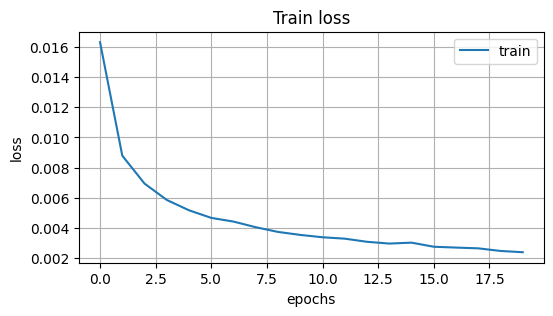

In [61]:
fig = plt.figure(figsize=(6,3))
plt.plot(history['loss'],label='train')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Train loss')
plt.legend()
plt.grid()
plt.show()

### Prediction  <a class="title_class" id="title_47"></a>

In [18]:
ynh_train=model2.predict(Xn3_train)
ynh_test=model2.predict(Xn3_test)

814/814 [==============================] - 6s 8ms/step


**From the normalized output to the °C**

In [19]:
yh_test=(ynh_test.flatten()/1.8+0.5)*(y_max-y_min)+y_min
yh_train=(ynh_train.flatten()/1.8+0.5)*(y_max-y_min)+y_min

In [20]:
# adapte the outputs to take in account the windaw 
# and to have the same size of inputs and outputs 
y_train=(yn3_train/1.8+0.5)*(y_max-y_min)+y_min
y_test=(yn3_test/1.8+0.5)*(y_max-y_min)+y_min

### Metrics and plot <a class="title_class" id="title_48"></a>

**Train/Test set Metrics**

In [94]:
print ('_'*20,'\n','Train set')
print(local_metrics(y_train, yh_train))

print ('_'*20,'\n','Test set')
print(local_metrics(y_test, yh_test))

____________________ 
 Train set
{'r2_score': 0.9670497054302775, 'MSE': 11.1632160396884, 'RMSE': 3.3411399311744487, 'NMSE': 0.0027476483309007817}
____________________ 
 Test set
{'r2_score': 0.9211842386327109, 'MSE': 25.63767626638323, 'RMSE': 5.063366100370704, 'NMSE': 0.008630940925311264}


**Real vs prediciton plot**

In [68]:
y_train, yh_train

(array([28.7659359 , 28.75426102, 28.8516655 , ..., 62.27448128,
        62.21632837, 62.14264575]),
 array([29.180582, 29.36076 , 29.525795, ..., 66.45154 , 66.41196 ,
        66.3602  ], dtype=float32))

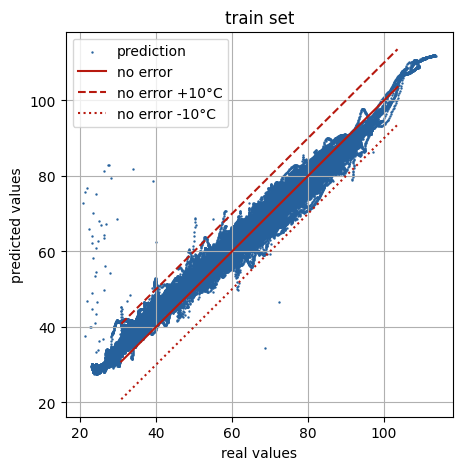

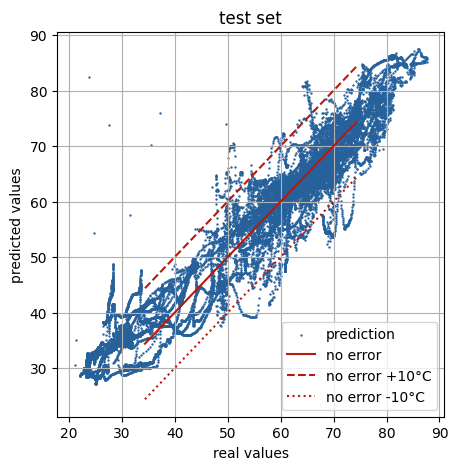

In [69]:
plot_prediction_real(y_train,yh_train,label='train set',offset=10,\
                     fig_size=(5,5))
plot_prediction_real(y_test,yh_test,label='test set',fig_size=(5,5))

**Time serie**

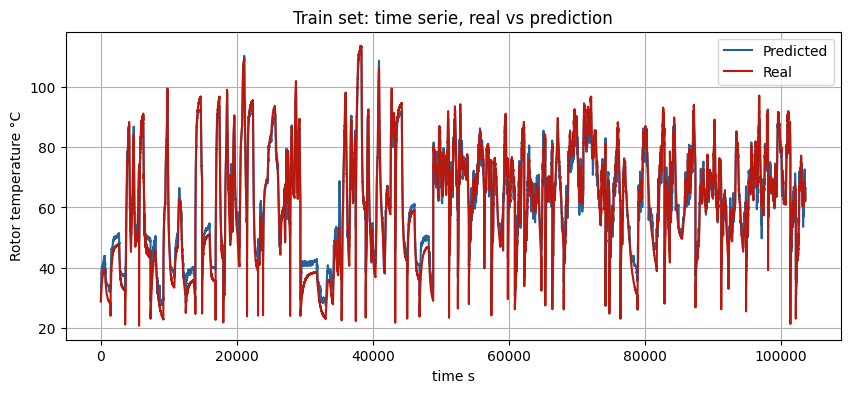

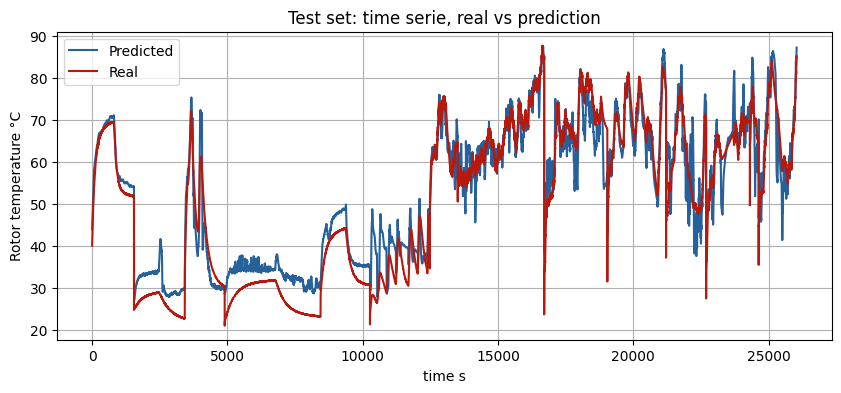

In [70]:
plot_y_yh_time(y_train,yh_train,title='Train set: time serie, real vs prediction',\
               fig_size=(10,4))
plot_y_yh_time(y_test,yh_test,title='Test set: time serie, real vs prediction',\
               fig_size=(10,4))

**Error histogram**

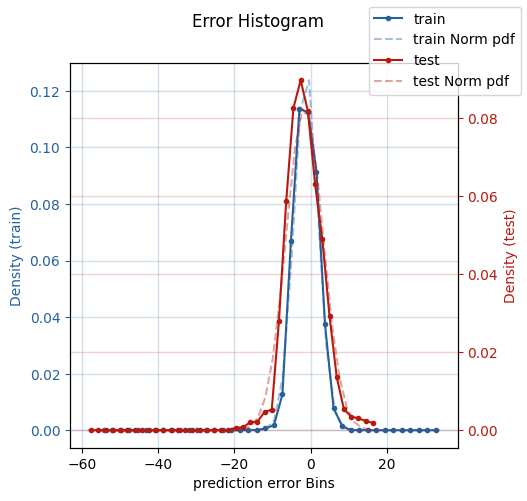

{'test': {'mean': -1.5537948017744347, 'std': 4.8190660900595645}, 'train': {'mean': -1.1761755081762932, 'std': 3.1272715286099864}}


In [21]:
_=plot_error(y_train, yh_train, y_test, yh_test)

# Models comparison and conclusion <a class="title_class" id="title_49"></a>

**Import libraries**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from utils import *

### Comparison of the metrics <a class="title_class" id="title_50"></a>

**The metrics of each model**

Organize the metrics of each model in a dictionary

In [25]:
dic={
'LinearRegression': {
'Train set':
{'r2_score': 0.8509728173767069, 'MSE': 52.41993356822764, 'RMSE': 7.240161156233171, 'NMSE': 0.013107461066154206}
,'Test set':
{'r2_score': 0.8409277832842572, 'MSE': 52.09309754904043, 'RMSE': 7.217554817875679, 'NMSE': 0.017792183457083922}  
} 
,'RandForest':{
'Train set':
{'r2_score': 0.9999009769749209, 'MSE': 0.03483109795810131, 'RMSE': 0.18663091372573118, 'NMSE': 8.709420811893875e-06}
,'Test set':
{'r2_score': 0.8775015737002211, 'MSE': 40.1158832295746, 'RMSE': 6.333710068322878, 'NMSE': 0.013701415111505402}
}
,'DNN': {
'Train set':
{'r2_score': 0.9319059301052521, 'MSE': 23.95176822640016, 'RMSE': 4.8940543750963945, 'NMSE': 0.005988927218422694}
,'Test set':
{'r2_score': 0.8455059571217549, 'MSE': 50.596522986960906, 'RMSE': 7.113123293389544, 'NMSE': 0.01728099215889291}
}
,'LSTM':{
'Train set':
{'r2_score': 0.9668431402709771, 'MSE': 11.651057054092657, 'RMSE': 3.41336447718269, 'NMSE': 0.0029121275239807}
,'Test set':
{'r2_score': 0.9195336751782257, 'MSE': 26.34358586713694, 'RMSE': 5.13260030268644, 'NMSE': 0.008986687432743007}
}
,'LSTM_session':{
'Train set':
{'r2_score': 0.9670497054302775, 'MSE': 11.1632160396884, 'RMSE': 3.3411399311744487, 'NMSE': 0.0027476483309007817}
,'Test set':
{'r2_score': 0.9211842386327109, 'MSE': 25.63767626638323, 'RMSE': 5.063366100370704, 'NMSE': 0.008630940925311264}
}
}

**Prepare the data Frame**

In [26]:
df_comp = pd.DataFrame.from_dict({(i,j): dic[i][j] 
                           for i in dic.keys() 
                           for j in dic[i].keys()},
                       orient='index')

df_comp

r2_score        MSE      RMSE      NMSE
LinearRegression Train set  0.850973  52.419934  7.240161  0.013107
                 Test set   0.840928  52.093098  7.217555  0.017792
RandForest       Train set  0.999901   0.034831  0.186631  0.000009
                 Test set   0.877502  40.115883  6.333710  0.013701
DNN              Train set  0.931906  23.951768  4.894054  0.005989
                 Test set   0.845506  50.596523  7.113123  0.017281
LSTM             Train set  0.966843  11.651057  3.413364  0.002912
                 Test set   0.919534  26.343586  5.132600  0.008987
LSTM_session     Train set  0.967050  11.163216  3.341140  0.002748
                 Test set   0.921184  25.637676  5.063366  0.008631

**Only Train set**

In [27]:
df_comp_train=df_comp.loc[(slice(None), 'Train set'), :]
df_comp_train

,,r2_score,MSE,RMSE,NMSE
LinearRegression,Train set,0.850973,52.419934,7.240161,0.013107
RandForest,Train set,0.999901,0.034831,0.186631,0.000009
DNN,Train set,0.931906,23.951768,4.894054,0.005989
LSTM,Train set,0.966843,11.651057,3.413364,0.002912
LSTM_session,Train set,0.967050,11.163216,3.341140,0.002748


**Only Test set**

In [28]:
df_comp_test=df_comp.loc[(slice(None), 'Test set'), :]
df_comp_test

,,r2_score,MSE,RMSE,NMSE
LinearRegression,Test set,0.840928,52.093098,7.217555,0.017792
RandForest,Test set,0.877502,40.115883,6.333710,0.013701
DNN,Test set,0.845506,50.596523,7.113123,0.017281
LSTM,Test set,0.919534,26.343586,5.132600,0.008987
LSTM_session,Test set,0.921184,25.637676,5.063366,0.008631


**Metric plots**

In [29]:
dfplot=df_comp['r2_score'].to_frame().reset_index(names=['models','train_test'])
dfplot

,models,train_test,r2_score
0,LinearRegression,Train set,0.850973
1,LinearRegression,Test set,0.840928
2,RandForest,Train set,0.999901
3,RandForest,Test set,0.877502
4,DNN,Train set,0.931906
5,DNN,Test set,0.845506
6,LSTM,Train set,0.966843
7,LSTM,Test set,0.919534
8,LSTM_session,Train set,0.967050
9,LSTM_session,Test set,0.921184


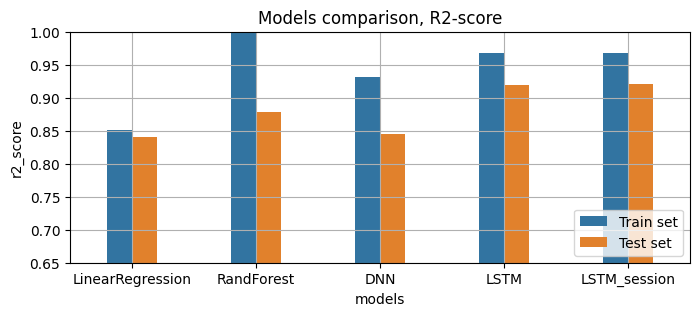

In [30]:
# Create sns bar plot
plt.figure(figsize=(8, 3))
sns.barplot(x='models', y='r2_score', hue='train_test', data=dfplot,width=0.4)
plt.legend( loc='lower right')
plt.grid()
plt.ylim([0.65,1])
plt.title("Models comparison, R2-score")
plt.show()

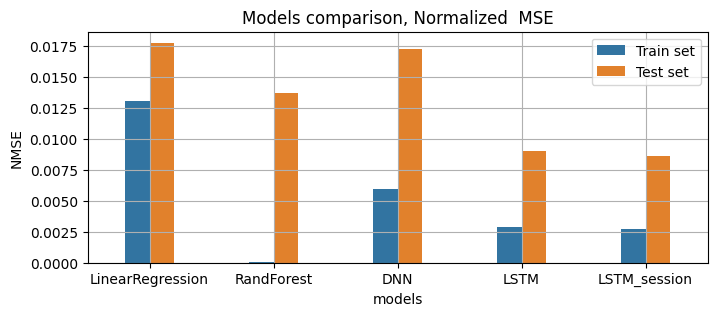

In [31]:
dfplot=df_comp['NMSE'].to_frame().reset_index(names=['models','train_test'])
# Create sns bar plot
plt.figure(figsize=(8, 3))
sns.barplot(x='models', y='NMSE', hue='train_test', data=dfplot,width=0.4)
plt.legend( loc='upper right')
plt.grid()
#plt.ylim([0.65,1])
plt.title("Models comparison, Normalized  MSE")
plt.show()

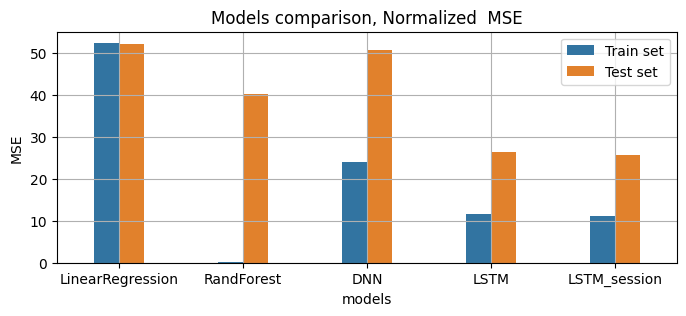

In [32]:
dfplot=df_comp['MSE'].to_frame().reset_index(names=['models','train_test'])
# Create sns bar plot
plt.figure(figsize=(8, 3))
sns.barplot(x='models', y='MSE', hue='train_test', data=dfplot,width=0.4)
plt.legend( loc='upper right')
plt.grid()
#plt.ylim([0.65,1])
plt.title("Models comparison, Normalized  MSE")
plt.show()

### The comparison of error mean/std of each model <a class="title_class" id="title_51"></a>

Organize the error mean/std of each model in a dictionary

In [33]:
dic={
'LinearRegression': 
    {'test': {'mean': -1.9822191989024145, 'std': 6.940021944961204}, 'train': {'mean': 4.4405223213114105e-14, 'std': 7.24016115623317}}
,'RandForest':
    {'test': {'mean': -1.0235385796178915, 'std': 6.250460143510107}, 'train': {'mean': -0.00014658345299136245, 'std': 0.1866308561610128}}
,'DNN': 
    {'test': {'mean': -1.7818939510828322, 'std': 6.886318097071564}, 'train': {'mean': -0.6292989497877967, 'std': 4.853426733576612}}
,'LSTM':
    {'test': {'mean': -1.6058626449807745, 'std': 4.874914464130862}, 'train': {'mean': -1.2347944542939768, 'std': 3.1821910234518445}}
,'LSTM_session':
    {'test': {'mean': -1.5537948017744347, 'std': 4.8190660900595645}, 'train': {'mean': -1.1761755081762932, 'std': 3.1272715286099864}}
}

**Prepare the data Frame**

In [34]:
# dict => df
df_comp = pd.DataFrame.from_dict({(i,j): dic[i][j] 
                           for i in dic.keys() 
                           for j in dic[i].keys()},
                       orient='index')
#calcul 3*sdt of each model 
df_comp['_3_sdt']=df_comp['std']*3
df_comp

mean       std     _3_sdt
LinearRegression test  -1.982219e+00  6.940022  20.820066
                 train  4.440522e-14  7.240161  21.720483
RandForest       test  -1.023539e+00  6.250460  18.751380
                 train -1.465835e-04  0.186631   0.559893
DNN              test  -1.781894e+00  6.886318  20.658954
                 train -6.292989e-01  4.853427  14.560280
LSTM             test  -1.605863e+00  4.874914  14.624743
                 train -1.234794e+00  3.182191   9.546573
LSTM_session     test  -1.553795e+00  4.819066  14.457198
                 train -1.176176e+00  3.127272   9.381815

**Why 3 STD of the error?**

In [35]:
for n_std in range(1,7):
    x=np.linspace(-n_std,n_std,10000)
    pdf=norm_pdf(x, mean=0, std=1)
    print('> the population covered by -', n_std, 'and +', n_std, 'STD is', \
          '{:.7f}'.format(100*np.trapz(y=pdf, x=x)) ,'%')
    

> the population covered by - 1 and + 1 STD is 68.2689491 %
> the population covered by - 2 and + 2 STD is 95.4499733 %
> the population covered by - 3 and + 3 STD is 99.7300203 %
> the population covered by - 4 and + 4 STD is 99.9936657 %
> the population covered by - 5 and + 5 STD is 99.9999427 %
> the population covered by - 6 and + 6 STD is 99.9999998 %


+/- 3 SDT cover 99.73% of the population

**Only Test set**

In [36]:
df_comp_train=df_comp.loc[(slice(None), 'test'), :]
df_comp_train

,,mean,std,_3_sdt
LinearRegression,test,-1.982219,6.940022,20.820066
RandForest,test,-1.023539,6.250460,18.751380
DNN,test,-1.781894,6.886318,20.658954
LSTM,test,-1.605863,4.874914,14.624743
LSTM_session,test,-1.553795,4.819066,14.457198


In [37]:
dfplot=df_comp_train['_3_sdt'].to_frame().reset_index(names=['models','train_test'])
dfplot

,models,train_test,_3_sdt
0,LinearRegression,test,20.820066
1,RandForest,test,18.751380
2,DNN,test,20.658954
3,LSTM,test,14.624743
4,LSTM_session,test,14.457198


**Plot 3 STD error of each models**

In [38]:
dfplot=df_comp['_3_sdt'].to_frame().reset_index(names=['models','train_test'])
dfplot.head()

,models,train_test,_3_sdt
0,LinearRegression,test,20.820066
1,LinearRegression,train,21.720483
2,RandForest,test,18.751380
3,RandForest,train,0.559893
4,DNN,test,20.658954


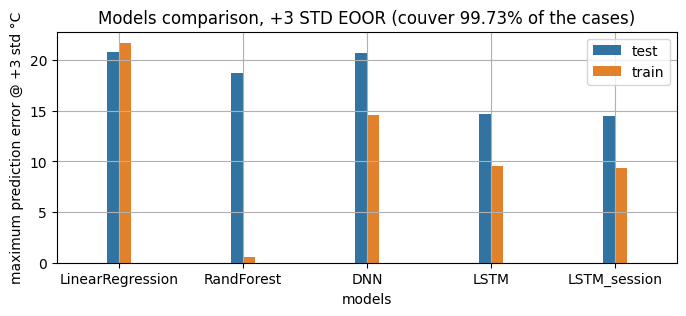

In [24]:
# Create sns bar plot
plt.figure(figsize=(8, 3))
sns.barplot(x='models', y='_3_sdt', hue='train_test', data=dfplot,width=0.2)
plt.legend( loc='upper right')
plt.grid()
plt.ylabel('maximum prediction error @ +3 std °C')
plt.title("Models comparison, +3 STD EOOR (couver 99.73% of the cases)")
plt.show()

### Conclusion <a class="title_class" id="title_52"></a>

The LSTM model is the best estimator, the difference between the first LSTM and LSTM_session is very small. 
<br> 
We can see also that the RandomForest overfit the train set.
<br> 
Since we predict a temperature from time series, the best model is a recurrent model, because the temperature at the time "t" depend to stat of the past. for example if the inertia time is 10min, the ideal model will be a model that take in account at least 10 min past data to predict the temperature. 
<br> 
Even with the LSTM model, the prediction is not very accurate in this projet. we can see above that the error at +/-3 STD is +/-14.5°C, this error is heigh. 
<br> 
The next step will be to tune the hyperparameters of the LSTM and to tray other recurrent model such the RNN (Recurrent Neural Network) and the GRU (Gated recurrent units)